<a href="https://colab.research.google.com/github/kp1216/DL-projects/blob/main/Cat%20and%20Dog%20Classification/Cat_and_Dog_Classifier_using_CNN_(Transfer_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Downloading Data from Kaggle

In [3]:

!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 45.1MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.6MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Imprting Dependencies

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from keras.applications import ResNet50
from tensorflow.keras.utils import plot_model
from keras import regularizers

# Split into Train and Test data

In [5]:

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# Data Visualization

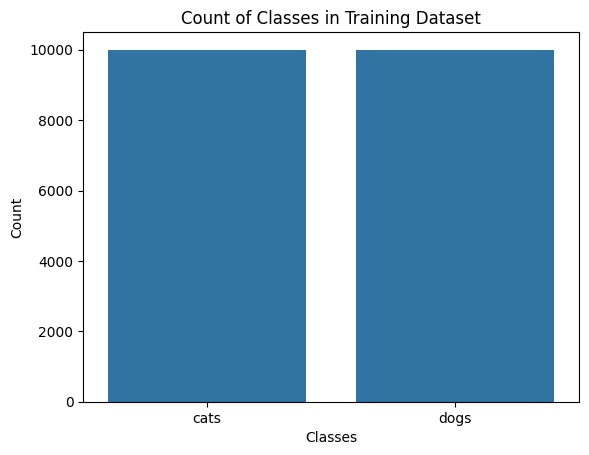

In [28]:
# Extract class labels from the dataset
class_names = train_ds.class_names
class_labels = []
for images, labels in train_ds.unbatch():

    class_labels.append(labels.numpy())

# Convert to a numpy array
class_labels = np.array(class_labels)

# Create a count plot
sns.countplot(x=class_labels)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Count of Classes in Training Dataset')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=0)
plt.show()

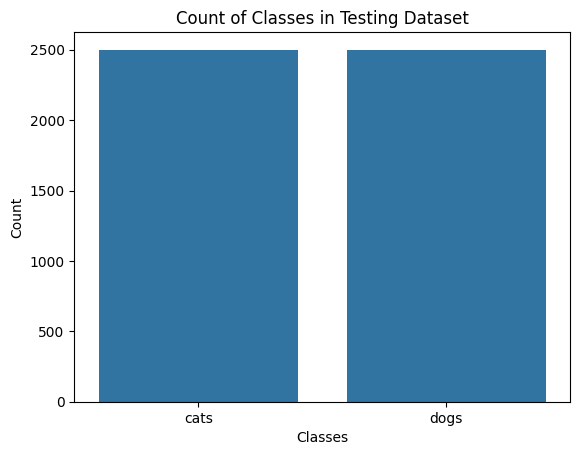

In [30]:
# Extract class labels from the dataset
class_names = validation_ds.class_names
class_labels = []
for images, labels in validation_ds.unbatch():

    class_labels.append(labels.numpy())

# Convert to a numpy array
class_labels = np.array(class_labels)

# Create a count plot
sns.countplot(x=class_labels)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Count of Classes in Testing Dataset')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=0)
plt.show()

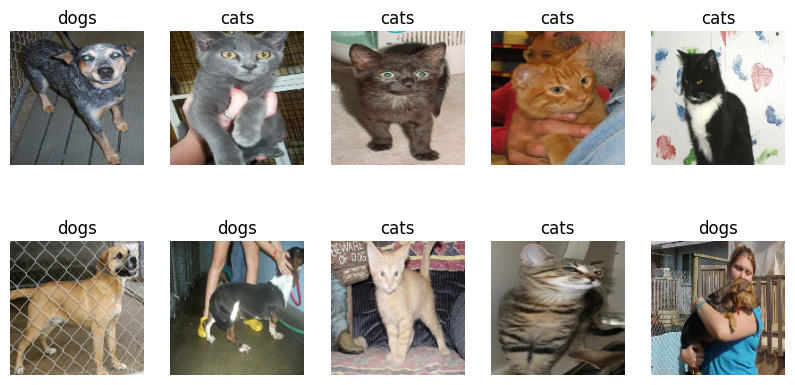

In [34]:
# print sample images form train dataset
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10,5))
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Get a batch of images and labels from the dataset
for images, labels in train_ds.take(1):
    plot_images(images, labels, class_names)
    break

plt.show()

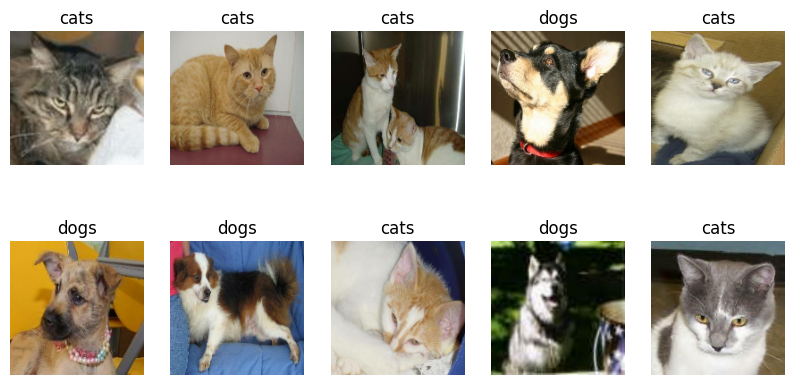

In [36]:
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Get a batch of images and labels from the dataset
for images, labels in validation_ds.take(1):
    plot_images(images, labels, class_names)
    break

plt.show()

# Prepare the Model

In [41]:
model = Sequential()
model.add(ResNet50(weights = "imagenet",include_top = False,input_shape = (150,150,3)))
model.add(Flatten())
model.add(Dense(256,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

94765736/94765736 [==============================] - 3s 0us/step


In [42]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 36695425 (139.98 MB)
Trainable params: 36642305 (139.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


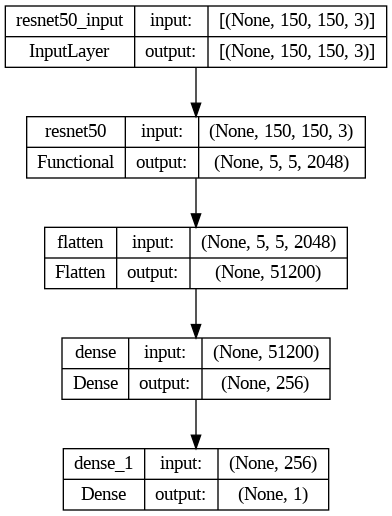

In [47]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [48]:
history = model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
625/625 [==============================] - 164s 201ms/step - loss: 0.3629 - accuracy: 0.8827 - val_loss: 0.6615 - val_accuracy: 0.7690
Epoch 2/15
625/625 [==============================] - 124s 198ms/step - loss: 0.1771 - accuracy: 0.9317 - val_loss: 1.6265 - val_accuracy: 0.6036
Epoch 3/15
625/625 [==============================] - 124s 198ms/step - loss: 0.1461 - accuracy: 0.9440 - val_loss: 0.4159 - val_accuracy: 0.8188
Epoch 4/15
625/625 [==============================] - 126s 201ms/step - loss: 0.1066 - accuracy: 0.9590 - val_loss: 0.6040 - val_accuracy: 0.7550
Epoch 5/15
625/625 [==============================] - 124s 198ms/step - loss: 0.3524 - accuracy: 0.8460 - val_loss: 0.5919 - val_accuracy: 0.7550
Epoch 6/15
625/625 [==============================] - 124s 198ms/step - loss: 0.1837 - accuracy: 0.9271 - val_loss: 0.2649 - val_accuracy: 0.9014
Epoch 7/15
625/625 [==============================] - 126s 201ms/step - loss: 0.0999 - accuracy: 0.9605 - val_loss: 0.1688 -

# Saving the model in Drive

In [50]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# save the model
model.save('/content/drive/My Drive/cat_dog_classifier')



Mounted at /content/drive


In [52]:
# Load the model from Google Drive
model = keras.models.load_model('/content/drive/My Drive/cat_dog_classifier')

# Verify the model is loaded correctly
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 36695425 (139.98 MB)
Trainable params: 36642305 (139.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


# Check for Overfitting

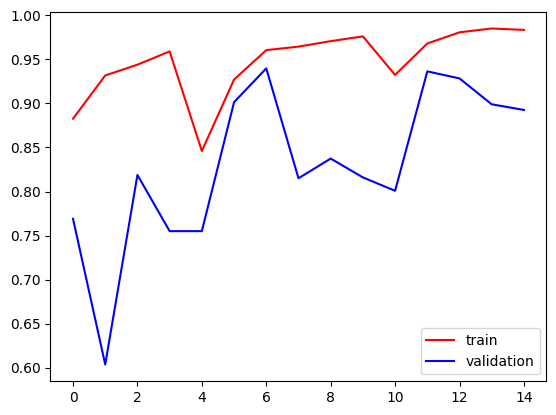

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

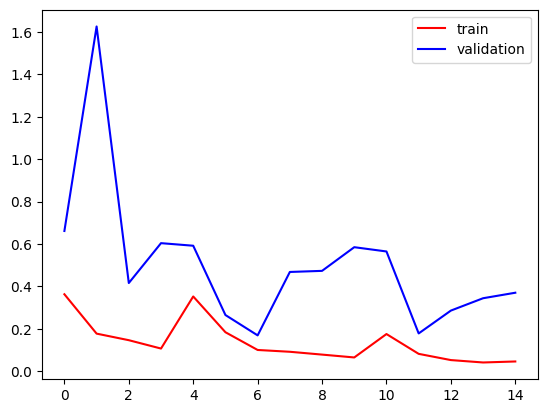

In [54]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# the mode is slightly overfitted